# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import linear_model

In [2]:
# Your code here.
student_data = pd.DataFrame({'age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,age,tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

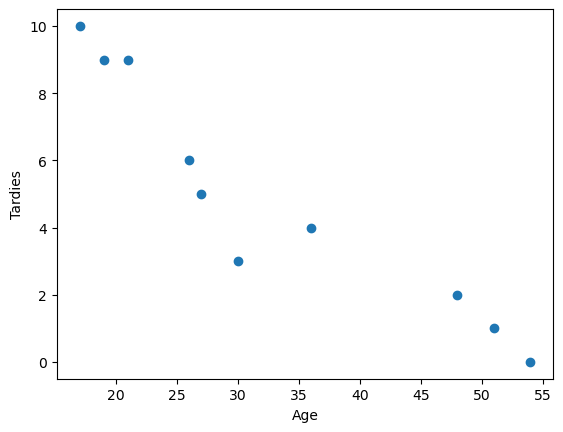

In [3]:
# Your code here.
plt.scatter(y=student_data.tardies, x=student_data.age)
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
'''I can clearly a trend, I can even say that I see a negative correlation on this plot. 
Indeed, it seems that the younger my students are, the more often they seem to arrive '''

'I can clearly a trend, I can even say that I see a negative correlation on this plot. \nIndeed, it seems that the younger my students are, the more often they seem to arrive '

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

covariance = -45.57


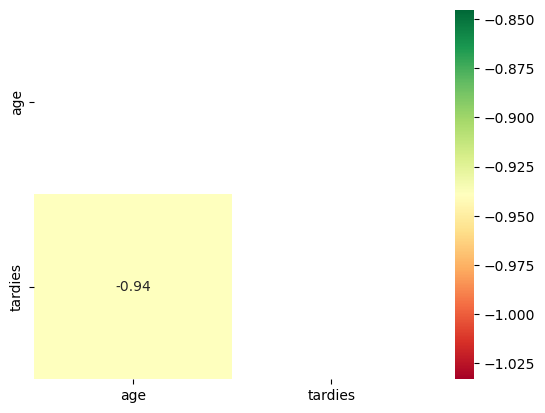

In [5]:
# Your response here.
#correlation:
correlation = student_data.corr()

mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation, mask = mask, annot = True, cmap = 'RdYlGn')

#covariance:
covariance = round(np.cov(student_data.age, student_data.tardies)[0,1],2)
print(f'covariance = {covariance}')


Covariance is negative, this only mean that when one increase, the other one decrease
But the correlation number is really high, with probably means that we can have a strong linear relationship

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [4]:
# Your response here.
model = linear_model.LinearRegression()
X = student_data.drop('tardies', axis=1)
y = student_data['tardies']

result = model.fit(X, y)

Plot your regression model on your scatter plot.

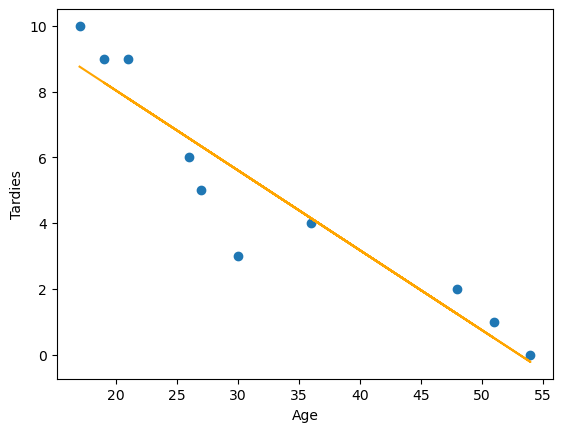

In [5]:
# Your code here.
regression_line = result.intercept_ + student_data.age * result.coef_
plt.plot(student_data.age, regression_line, c='orange')

# Add line plot and scatter plot
plt.scatter(x = student_data.age, y = student_data.tardies)
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [47]:
# Your response here. 
'''We can validate the hypothesis thay the younger a student is, the more likely he is to arrive late in class. 
Age can be a good predictor of tardiness, but according to me the sample of people is too low. I would say yes it is, but not in every cases'''


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [6]:
# Import any libraries you may need & the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import linear_model
from plotly.subplots import make_subplots

In [7]:
df_cars = pd.read_csv('vehicles.csv')
df_cars.head(10)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
5,Acura,2.2CL/3.0CL,1997,2.2,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,20,26,22,403.954545,1500
6,Acura,2.2CL/3.0CL,1997,2.2,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,22,28,24,370.291667,1400
7,Acura,2.2CL/3.0CL,1997,3.0,6.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,16.480500,18,26,20,444.350000,1650
8,Acura,2.3CL/3.0CL,1998,2.3,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,19,27,22,403.954545,1500
9,Acura,2.3CL/3.0CL,1998,2.3,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,21,29,24,370.291667,1400


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [8]:
# Your response here. 
df_cars_reduced = df_cars[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
df_cars_reduced.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [9]:
df_cars_reduced.corr(numeric_only=True)
df_cars_reduced_corr = df_cars_reduced.corr(numeric_only=True)
df_cars_reduced_corr.style.background_gradient(cmap='RdYlGn').format('{:,.2f}')

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.00,0.08,-0.22,0.20,-0.09,-0.22
Cylinders,0.08,1.00,0.74,-0.70,0.78,0.75
Fuel Barrels/Year,-0.22,0.74,1.00,-0.91,0.92,0.99
Combined MPG,0.20,-0.70,-0.91,1.00,-0.88,-0.93
Fuel Cost/Year,-0.09,0.78,0.92,-0.88,1.00,0.93
CO2 Emission Grams/Mile,-0.22,0.75,0.99,-0.93,0.93,1.00


Looking at correlation between each variable, I will decide to look if there is a linear regression between combined MPG and CO2 emission.
I assume that the more we use petrol, the higher CO2 emission will be

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [10]:
df_cars_reduced.drop('Fuel Barrels/Year', axis=1, inplace=True)

C:\Users\misol\AppData\Local\Temp\ipykernel_7388\2951021915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cars_reduced.drop('Fuel Barrels/Year', axis=1, inplace=True)


In [11]:
# Your response here. 
df_cars_reduced.isna().sum()

Year                       0
Cylinders                  0
Combined MPG               0
Fuel Cost/Year             0
CO2 Emission Grams/Mile    0
dtype: int64

In [12]:
df_cars_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     35952 non-null  int64  
 1   Cylinders                35952 non-null  float64
 2   Combined MPG             35952 non-null  int64  
 3   Fuel Cost/Year           35952 non-null  int64  
 4   CO2 Emission Grams/Mile  35952 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 1.4 MB


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [13]:
X = df_cars_reduced.drop(['CO2 Emission Grams/Mile'], axis = 1)
y = df_cars_reduced['CO2 Emission Grams/Mile']

In [14]:
model = linear_model.LinearRegression()
result = model.fit(X, y)

In [15]:
print(result.intercept_)
print(result.coef_)

2775.8454009611946
[-1.1790046   6.20298442 -9.70381129  0.11410475]


In [16]:
result.score(X, y)

0.9292105333039892

In [ ]:
# Your response here. 
'''I would like to conclude that we have a strong and linear relatioship relatioship between all the following feature :
'Cylinders', 'Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile''''


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [17]:
# Your code here.
party_data = pd.DataFrame({'invited': [1, 3, 4, 6, 8, 9, 11, 14], 'attendance': [1, 2, 4, 4, 5, 7, 8, 13]})
party_data

,invited,attendance
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

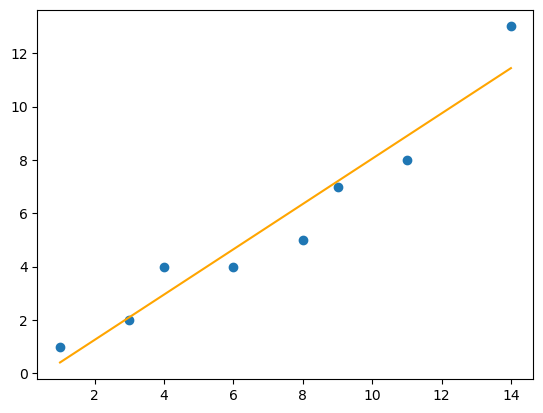

In [18]:
# Your code here.
model = linear_model.LinearRegression()
X = party_data.drop('attendance', axis=1)
y = party_data['attendance']
result = model.fit(X, y)
regression_line = result.intercept_ + party_data.invited * result.coef_
plt.plot(party_data.invited, regression_line, c='orange')
plt.scatter(x=party_data.invited, y=party_data.attendance)


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [19]:
# Your response here. 
print(model.score(X, y))

print(party_data.corr())

print(result.coef_)
print(result.intercept_)

"""I see a strong linear regression between the more we invite people, the more will not come"""


0.9316696375519905
            invited  attendance
invited     1.00000     0.96523
attendance  0.96523     1.00000
[0.84848485]
-0.43939393939393945


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 
"""Maybe the point (14,13) is an outliner. I don't think it is, but to make sure we will take it out of the dataset."""


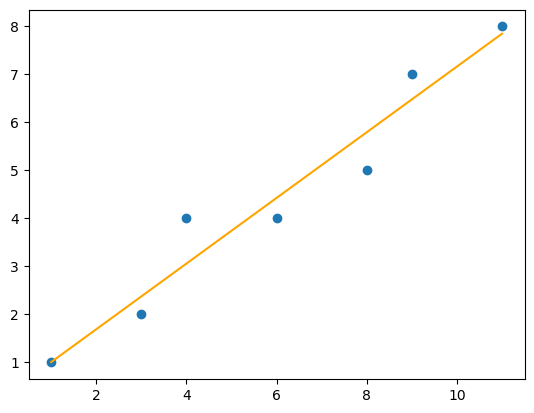

In [21]:
party_data_cleaned = party_data.drop(index = 7)
model = linear_model.LinearRegression()
X = party_data_cleaned.drop('attendance', axis=1)
y = party_data_cleaned['attendance']
result = model.fit(X, y)
regression_line = result.intercept_ + party_data_cleaned.invited * result.coef_
plt.plot(party_data_cleaned.invited, regression_line, c='orange')
plt.scatter(x=party_data_cleaned.invited, y=party_data_cleaned.attendance)

In [22]:
print(model.score(X, y))

print(party_data.corr())

print(result.coef_)
print(result.intercept_)

0.9433811802232854
            invited  attendance
invited     1.00000     0.96523
attendance  0.96523     1.00000
[0.68421053]
0.32330827067669077


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
"""The linear regression is now better. It can cahnge the result significantly on a large amount of people : for 100 people invited, we now expect 64"""
